In [129]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Базовая работа с изображением

In [130]:
image = cv2.imread('sar_2_color.jpg')

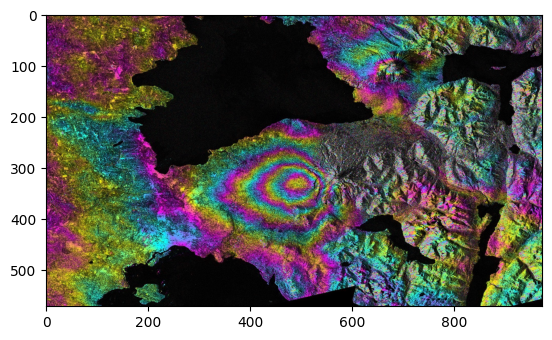

In [131]:
plt.imshow(image)

In [132]:
image.shape # h,w,c

(572, 974, 3)

In [133]:
image[250,250] # b,g,r

array([12, 12, 12], dtype=uint8)

In [134]:
# ROI
img_roi = image[100:200, 500:700]

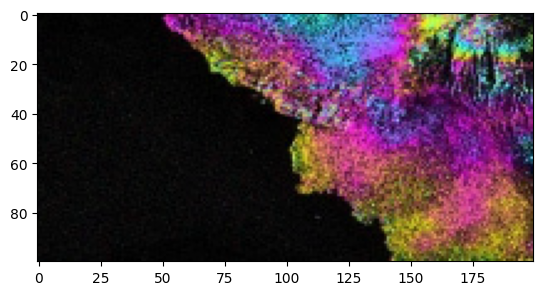

In [135]:
plt.imshow(img_roi)

In [136]:
b,g,r = cv2.split(image)

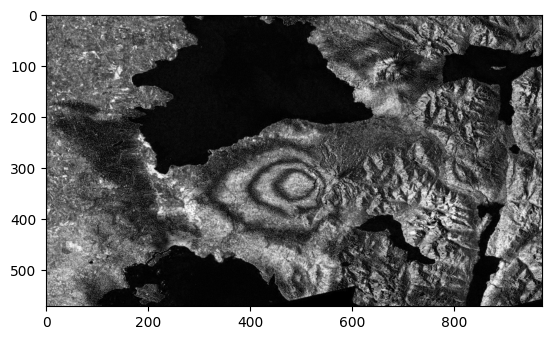

In [137]:
plt.imshow(b, cmap = 'gray')

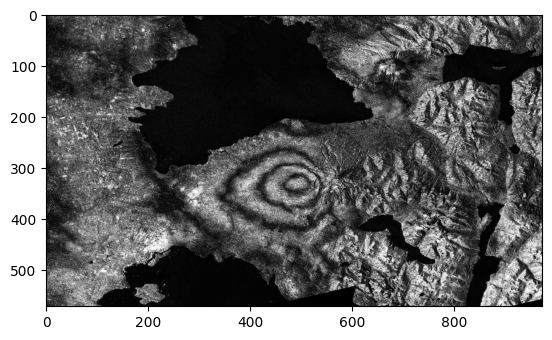

In [138]:
plt.imshow(g, cmap = 'gray')

In [139]:
# alternative approach
b = image[:,:,0]

In [140]:
import copy

image2 = copy.deepcopy(image)

In [141]:
image2[50:100,50:100] = [0,0,0]

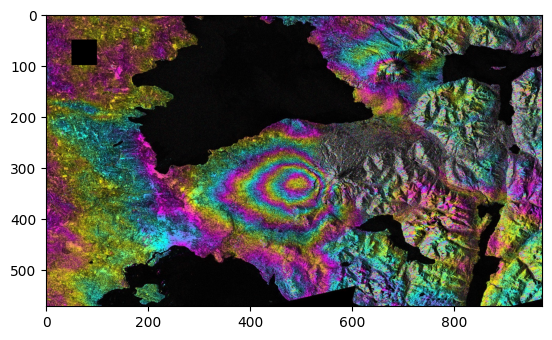

In [142]:
plt.imshow(image2)

In [143]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

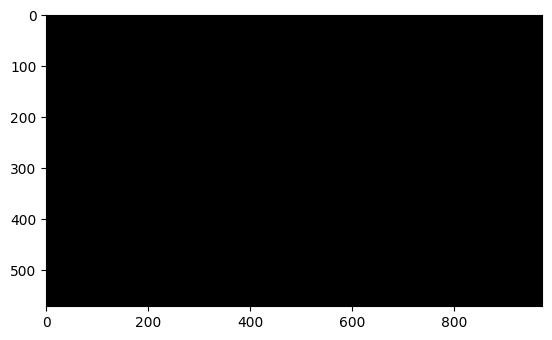

In [144]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [145]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [146]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [147]:
image_gray[0,0]

np.uint8(40)

In [148]:
image_gray.shape

(572, 974)

In [149]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

In [150]:
image_hsv.shape

(572, 974, 3)

In [151]:
image_hsv[0,0]

array([117, 143,  75], dtype=uint8)

In [152]:
image[0,0]

array([75, 37, 33], dtype=uint8)

In [153]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [154]:
image_lab[0,0]

array([ 42, 139, 104], dtype=uint8)

# Пороговая фильтрация

In [155]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

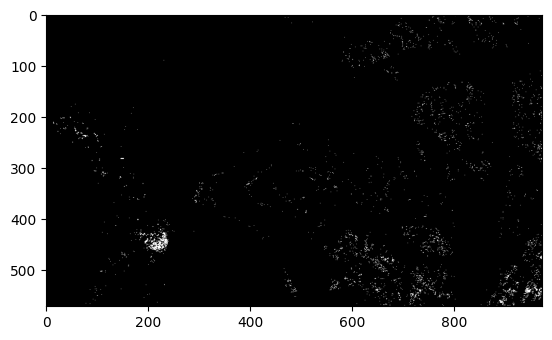

In [156]:
plt.imshow(thresh1, cmap='gray')

In [157]:
thresh1[thresh1==100].sum()

np.uint64(0)

# Построение гистограммы

In [158]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

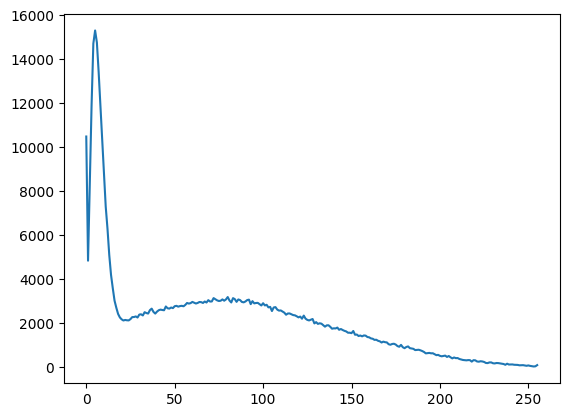

In [159]:
plt.plot(b_hist)

In [160]:
b_hist_cum = b_hist.cumsum()

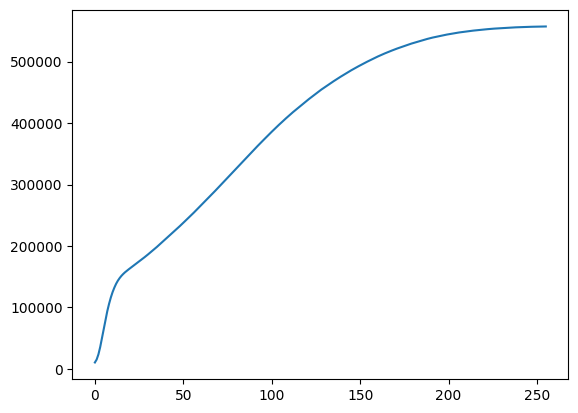

In [161]:
plt.plot(b_hist_cum)

In [162]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

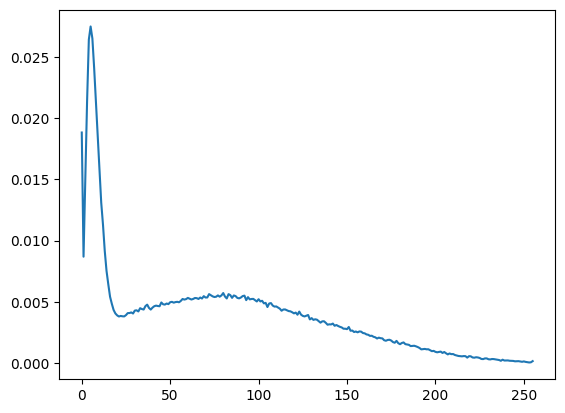

In [163]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [164]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


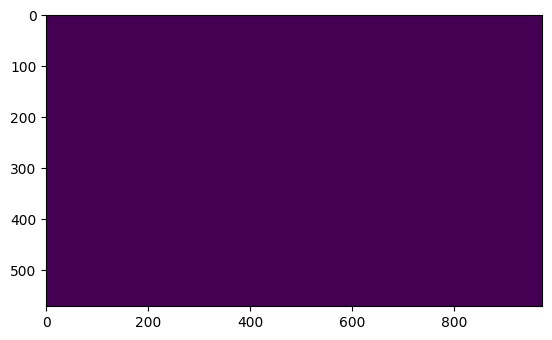

In [165]:
plt.imshow(diff)

In [166]:
mse = mean_squared_error(image_gray, image_gray)
mse

np.float64(0.0)

# Статистические характеристики изображений

In [167]:
mean = image_gray.mean()

In [168]:
std = image_gray.std()

In [169]:
print(mean,std)

67.41225535245043 52.016191875959635


In [170]:
eq_gray = cv2.equalizeHist(image_gray)

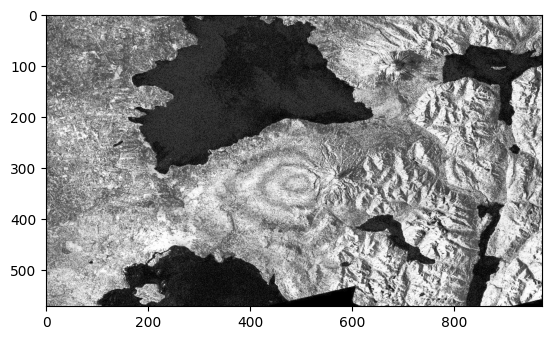

In [171]:
plt.imshow(eq_gray, cmap="gray")


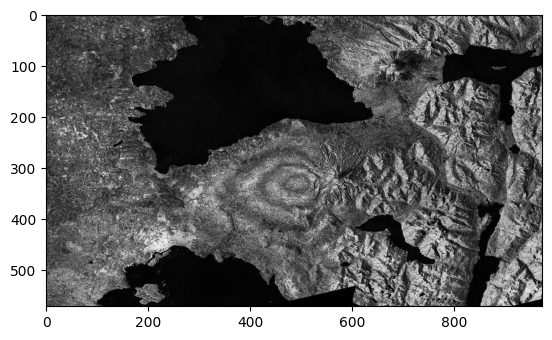

In [172]:
plt.imshow(image_gray, cmap="gray")

In [173]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


# Домашнее задание

## 1. Загрузите изображение в оттенках серого sar_1_gray.jpg.

In [174]:
image3 = cv2.imread('sar_1_gray.jpg')

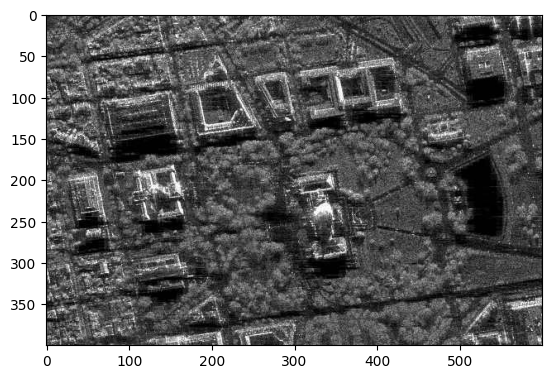

In [175]:
plt.imshow(image3)

## 2. Постройте гистограмму

In [176]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

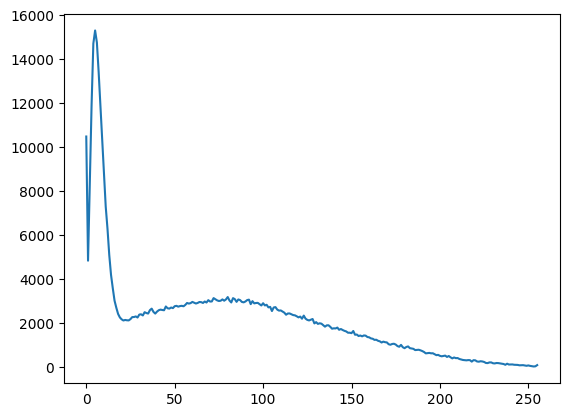

In [177]:
plt.plot(b_hist)

In [178]:
b_hist_cum = b_hist.cumsum()

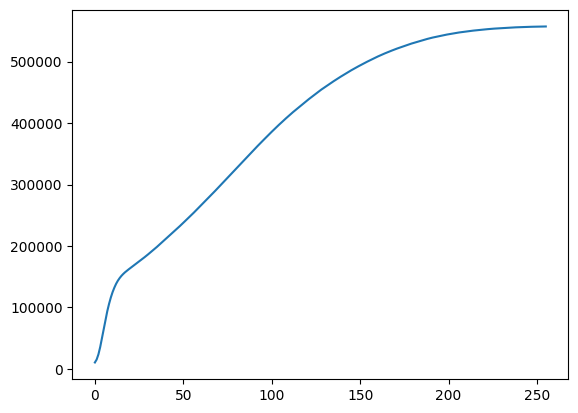

In [179]:
plt.plot(b_hist_cum)

In [180]:
b_hist_norm = b_hist /  (image3.shape[0] * image3.shape[1])

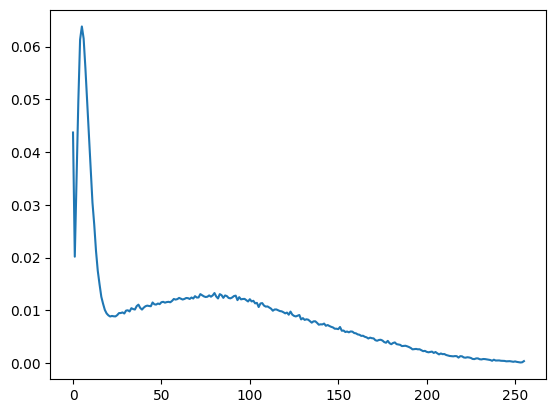

In [181]:
plt.plot(b_hist_norm)

## 3. Реализуйте алгоритм гамма коррекции с параметром гамма <1, 1>.

In [182]:
image4 = copy.deepcopy(image3)

In [183]:
gamma_low = 0.5
image_gamma_low = np.array(255 * (image4 / 255.0) ** gamma_low, dtype='uint8')

In [184]:
gamma_high = 1.5
image_gamma_high = np.array(255 * (image4 / 255.0) ** gamma_high, dtype='uint8')

### Исходное изображение

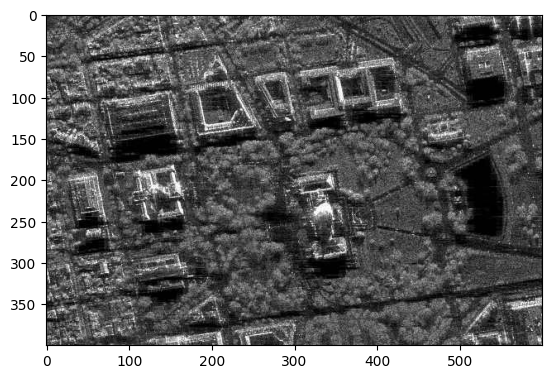

In [185]:
plt.imshow(image4)

### Гамма 0.5

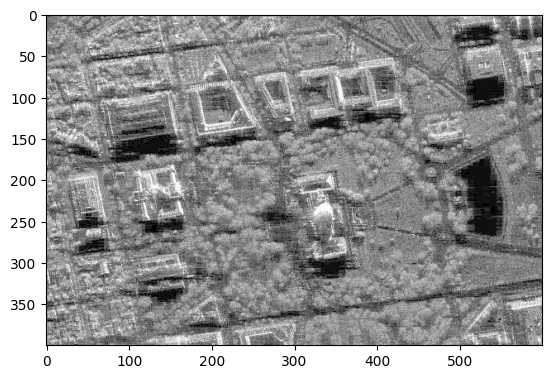

In [186]:
plt.imshow(image_gamma_low)

### Гамма 1.5

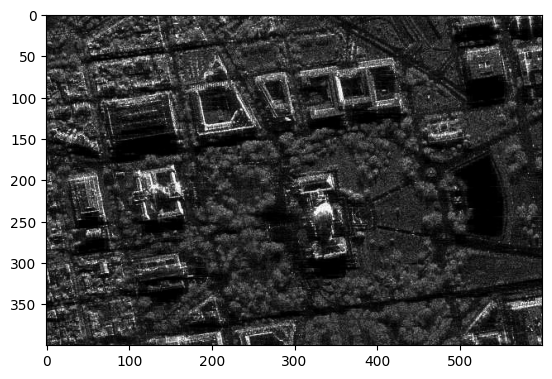

In [187]:
plt.imshow(image_gamma_high)

## 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.

In [188]:
image4_gray = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY) 
image_gamma_low_gray = cv2.cvtColor(image_gamma_low, cv2.COLOR_BGR2GRAY) 

In [189]:
(ssim_low, diff_low) = structural_similarity(image4_gray, image_gamma_low_gray, full=True)
diff_low = (diff_low * 255).astype("uint8")

print("SSIM: {}".format(ssim))

SSIM: 1.0


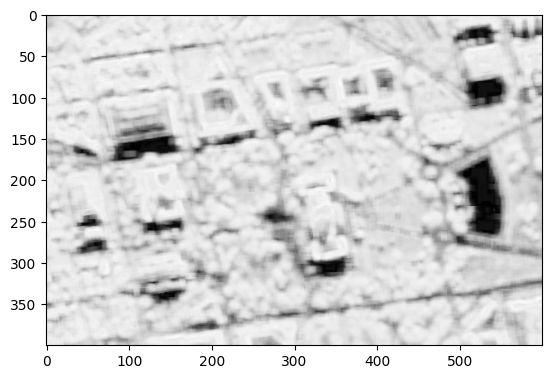

In [190]:
plt.imshow(diff_low, cmap="gray")

In [191]:
image_gamma_high_gray = cv2.cvtColor(image_gamma_high, cv2.COLOR_BGR2GRAY) 

In [192]:
(ssim_high, diff_high) = structural_similarity(image4_gray, image_gamma_high_gray, full=True)
diff_high = (diff_high * 255).astype("uint8")

print("SSIM: {}".format(ssim))

SSIM: 1.0


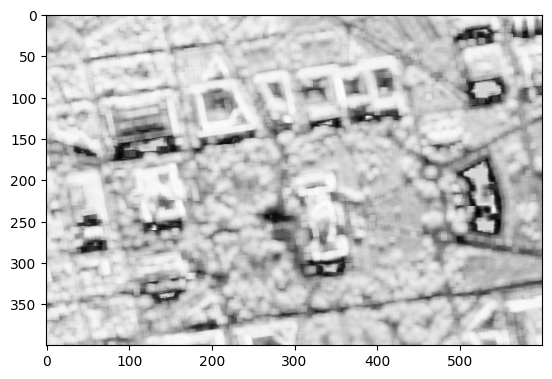

In [193]:
plt.imshow(diff_high, cmap="gray")


In [194]:
mse_low = mean_squared_error(image4_gray, image_gamma_low_gray)
print("MSE: {}".format(mse_low))

MSE: 3250.429145833333


In [195]:
mse_high = mean_squared_error(image4_gray, image_gamma_high_gray)
print("MSE: {}".format(mse_high))

MSE: 971.8206541666667


## 5. Реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.

(np.float64(-0.5), np.float64(973.5), np.float64(571.5), np.float64(-0.5))

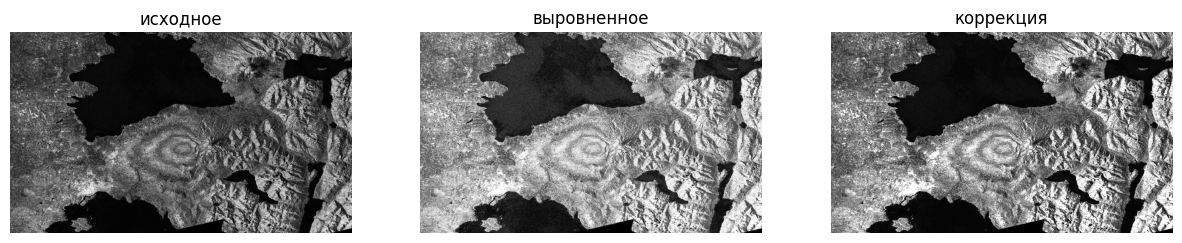

In [196]:
eq_gray = cv2.equalizeHist(image_gray)

mean_src = image_gray.mean()
std_src = image_gray.std()

mean_ref = eq_gray.mean()
std_ref = eq_gray.std()

stat_corrected = ( (image_gray - mean_src) * (std_ref/std_src) + mean_ref )
stat_corrected = np.clip(stat_corrected, 0, 255).astype(np.uint8)

plt.figure(figsize=(15, 12))

plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap="gray")
plt.title('исходное')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(eq_gray, cmap="gray")
plt.title('выровненное')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(stat_corrected, cmap="gray")
plt.title('коррекция')
plt.axis("off")

## 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.

### T=50, THRESH_BINARY

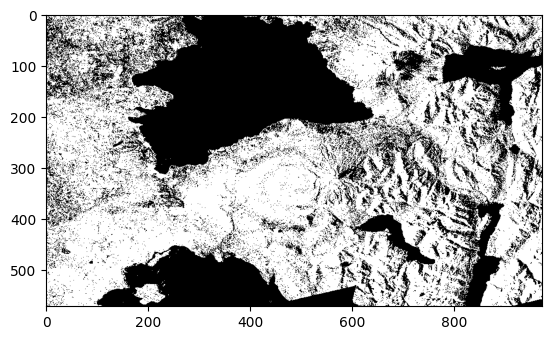

In [197]:
_, thresh = cv2.threshold(image_gray, 50, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

### T=100, THRESH_BINARY

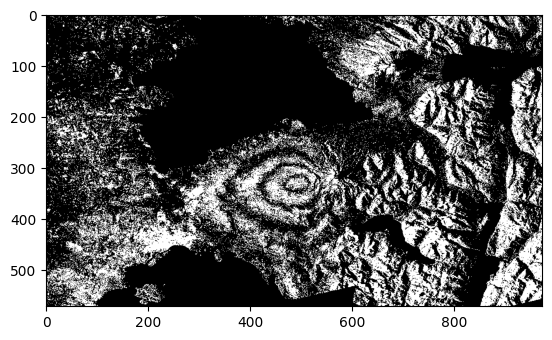

In [198]:
_, thresh = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

### T=150, THRESH_BINARY

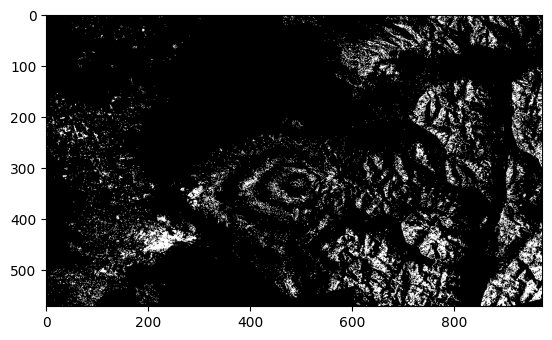

In [199]:
_, thresh = cv2.threshold(image_gray, 150, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

### T=50, THRESH_BINARY_INV

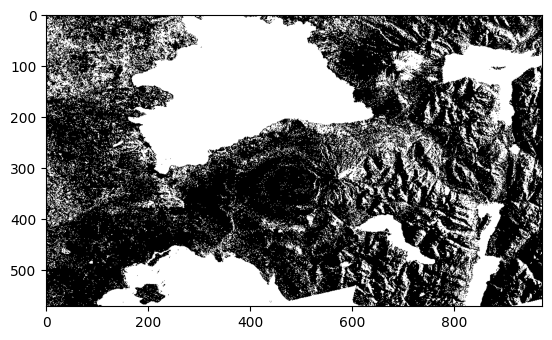

In [200]:
_, thresh = cv2.threshold(image_gray, 50, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')

### T=100, THRESH_BINARY_INV

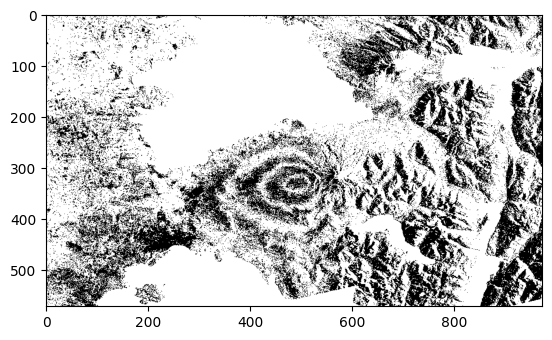

In [201]:
_, thresh = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')

### T=150, THRESH_BINARY_INV

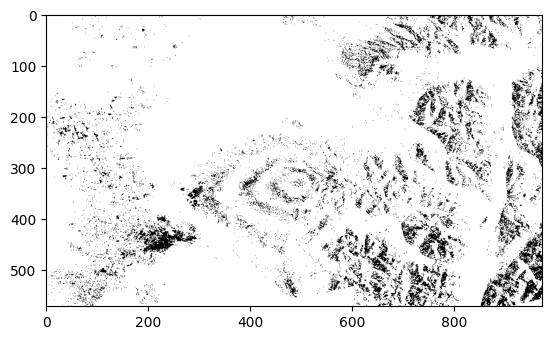

In [202]:
_, thresh = cv2.threshold(image_gray, 150, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')

### T=50, THRESH_TRUNC

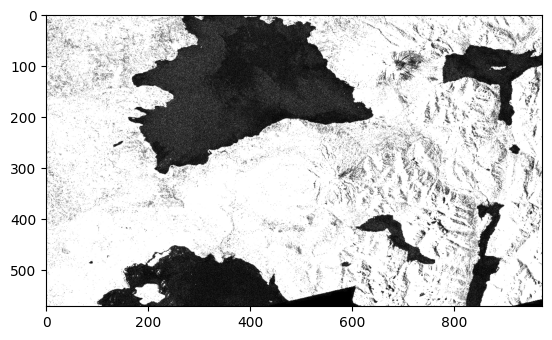

In [203]:
_, thresh = cv2.threshold(image_gray, 50, 255, cv2.THRESH_TRUNC)
plt.imshow(thresh, cmap='gray')

### T=100, THRESH_TRUNC

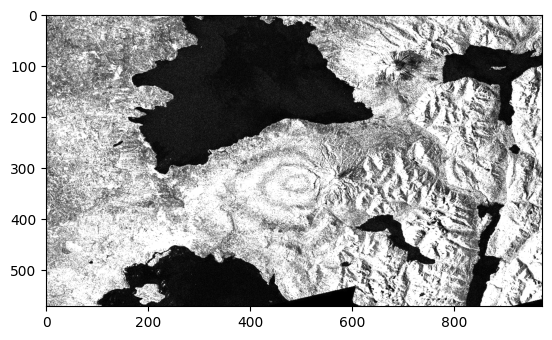

In [204]:
_, thresh = cv2.threshold(image_gray, 100, 255, cv2.THRESH_TRUNC)
plt.imshow(thresh, cmap='gray')

### T=150, THRESH_TRUNC

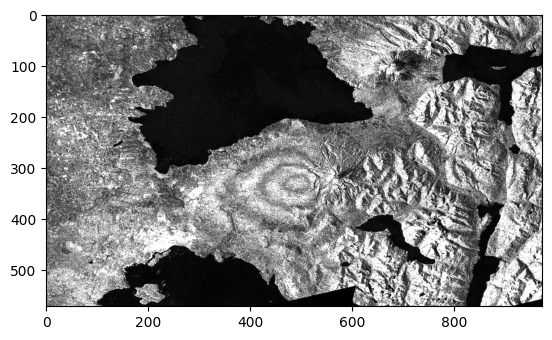

In [205]:
_, thresh = cv2.threshold(image_gray, 150, 255, cv2.THRESH_TRUNC)
plt.imshow(thresh, cmap='gray')

### T=50, THRESH_TOZERO

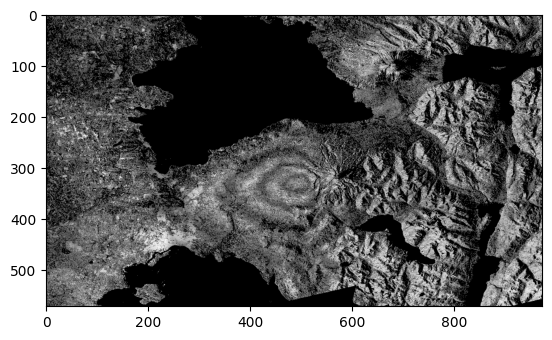

In [206]:
_, thresh = cv2.threshold(image_gray, 50, 255, cv2.THRESH_TOZERO)
plt.imshow(thresh, cmap='gray')

### T=100, THRESH_TOZERO

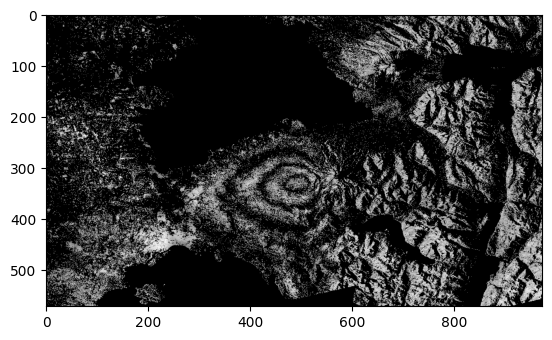

In [207]:
_, thresh = cv2.threshold(image_gray, 100, 255, cv2.THRESH_TOZERO)
plt.imshow(thresh, cmap='gray')

### T=150, THRESH_TOZERO

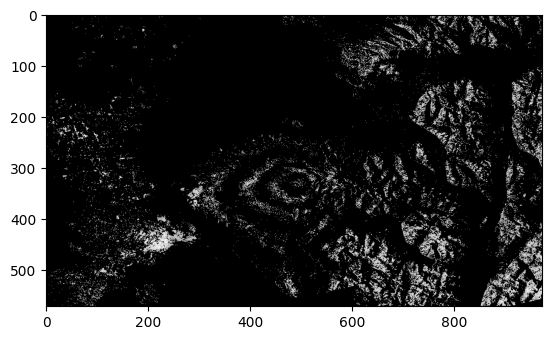

In [208]:
_, thresh = cv2.threshold(image_gray, 150, 255, cv2.THRESH_TOZERO)
plt.imshow(thresh, cmap='gray')

### T=50, THRESH_TOZERO_INV

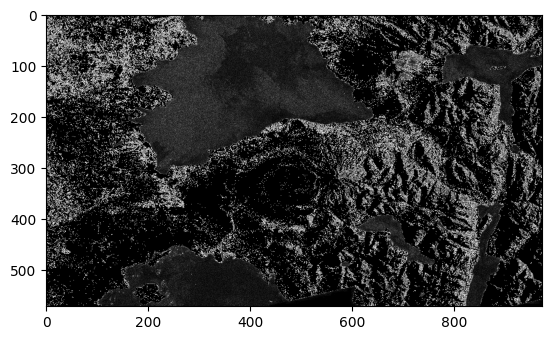

In [209]:
_, thresh = cv2.threshold(image_gray, 50, 255, cv2.THRESH_TOZERO_INV)
plt.imshow(thresh, cmap='gray')

### T=100, THRESH_TOZERO_INV

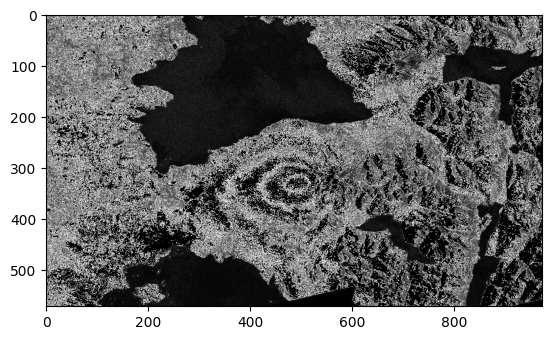

In [210]:
_, thresh = cv2.threshold(image_gray, 100, 255, cv2.THRESH_TOZERO_INV)
plt.imshow(thresh, cmap='gray')

### T=150, THRESH_TOZERO_INV

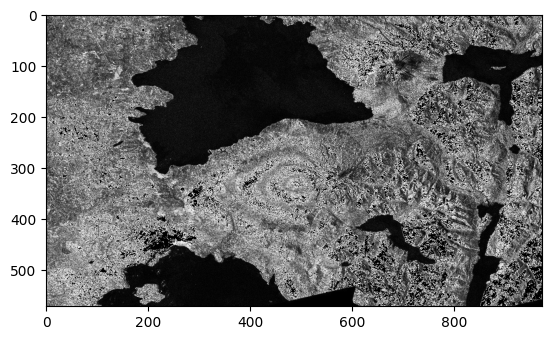

In [211]:
_, thresh = cv2.threshold(image_gray, 150, 255, cv2.THRESH_TOZERO_INV)
plt.imshow(thresh, cmap='gray')